In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
  

#Reading and Understanding the data and proceeding with EDA analysis

In [2]:
bikes = pd.read_csv('day.csv')
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

#Checking the correlation for all the fields using Pairplot

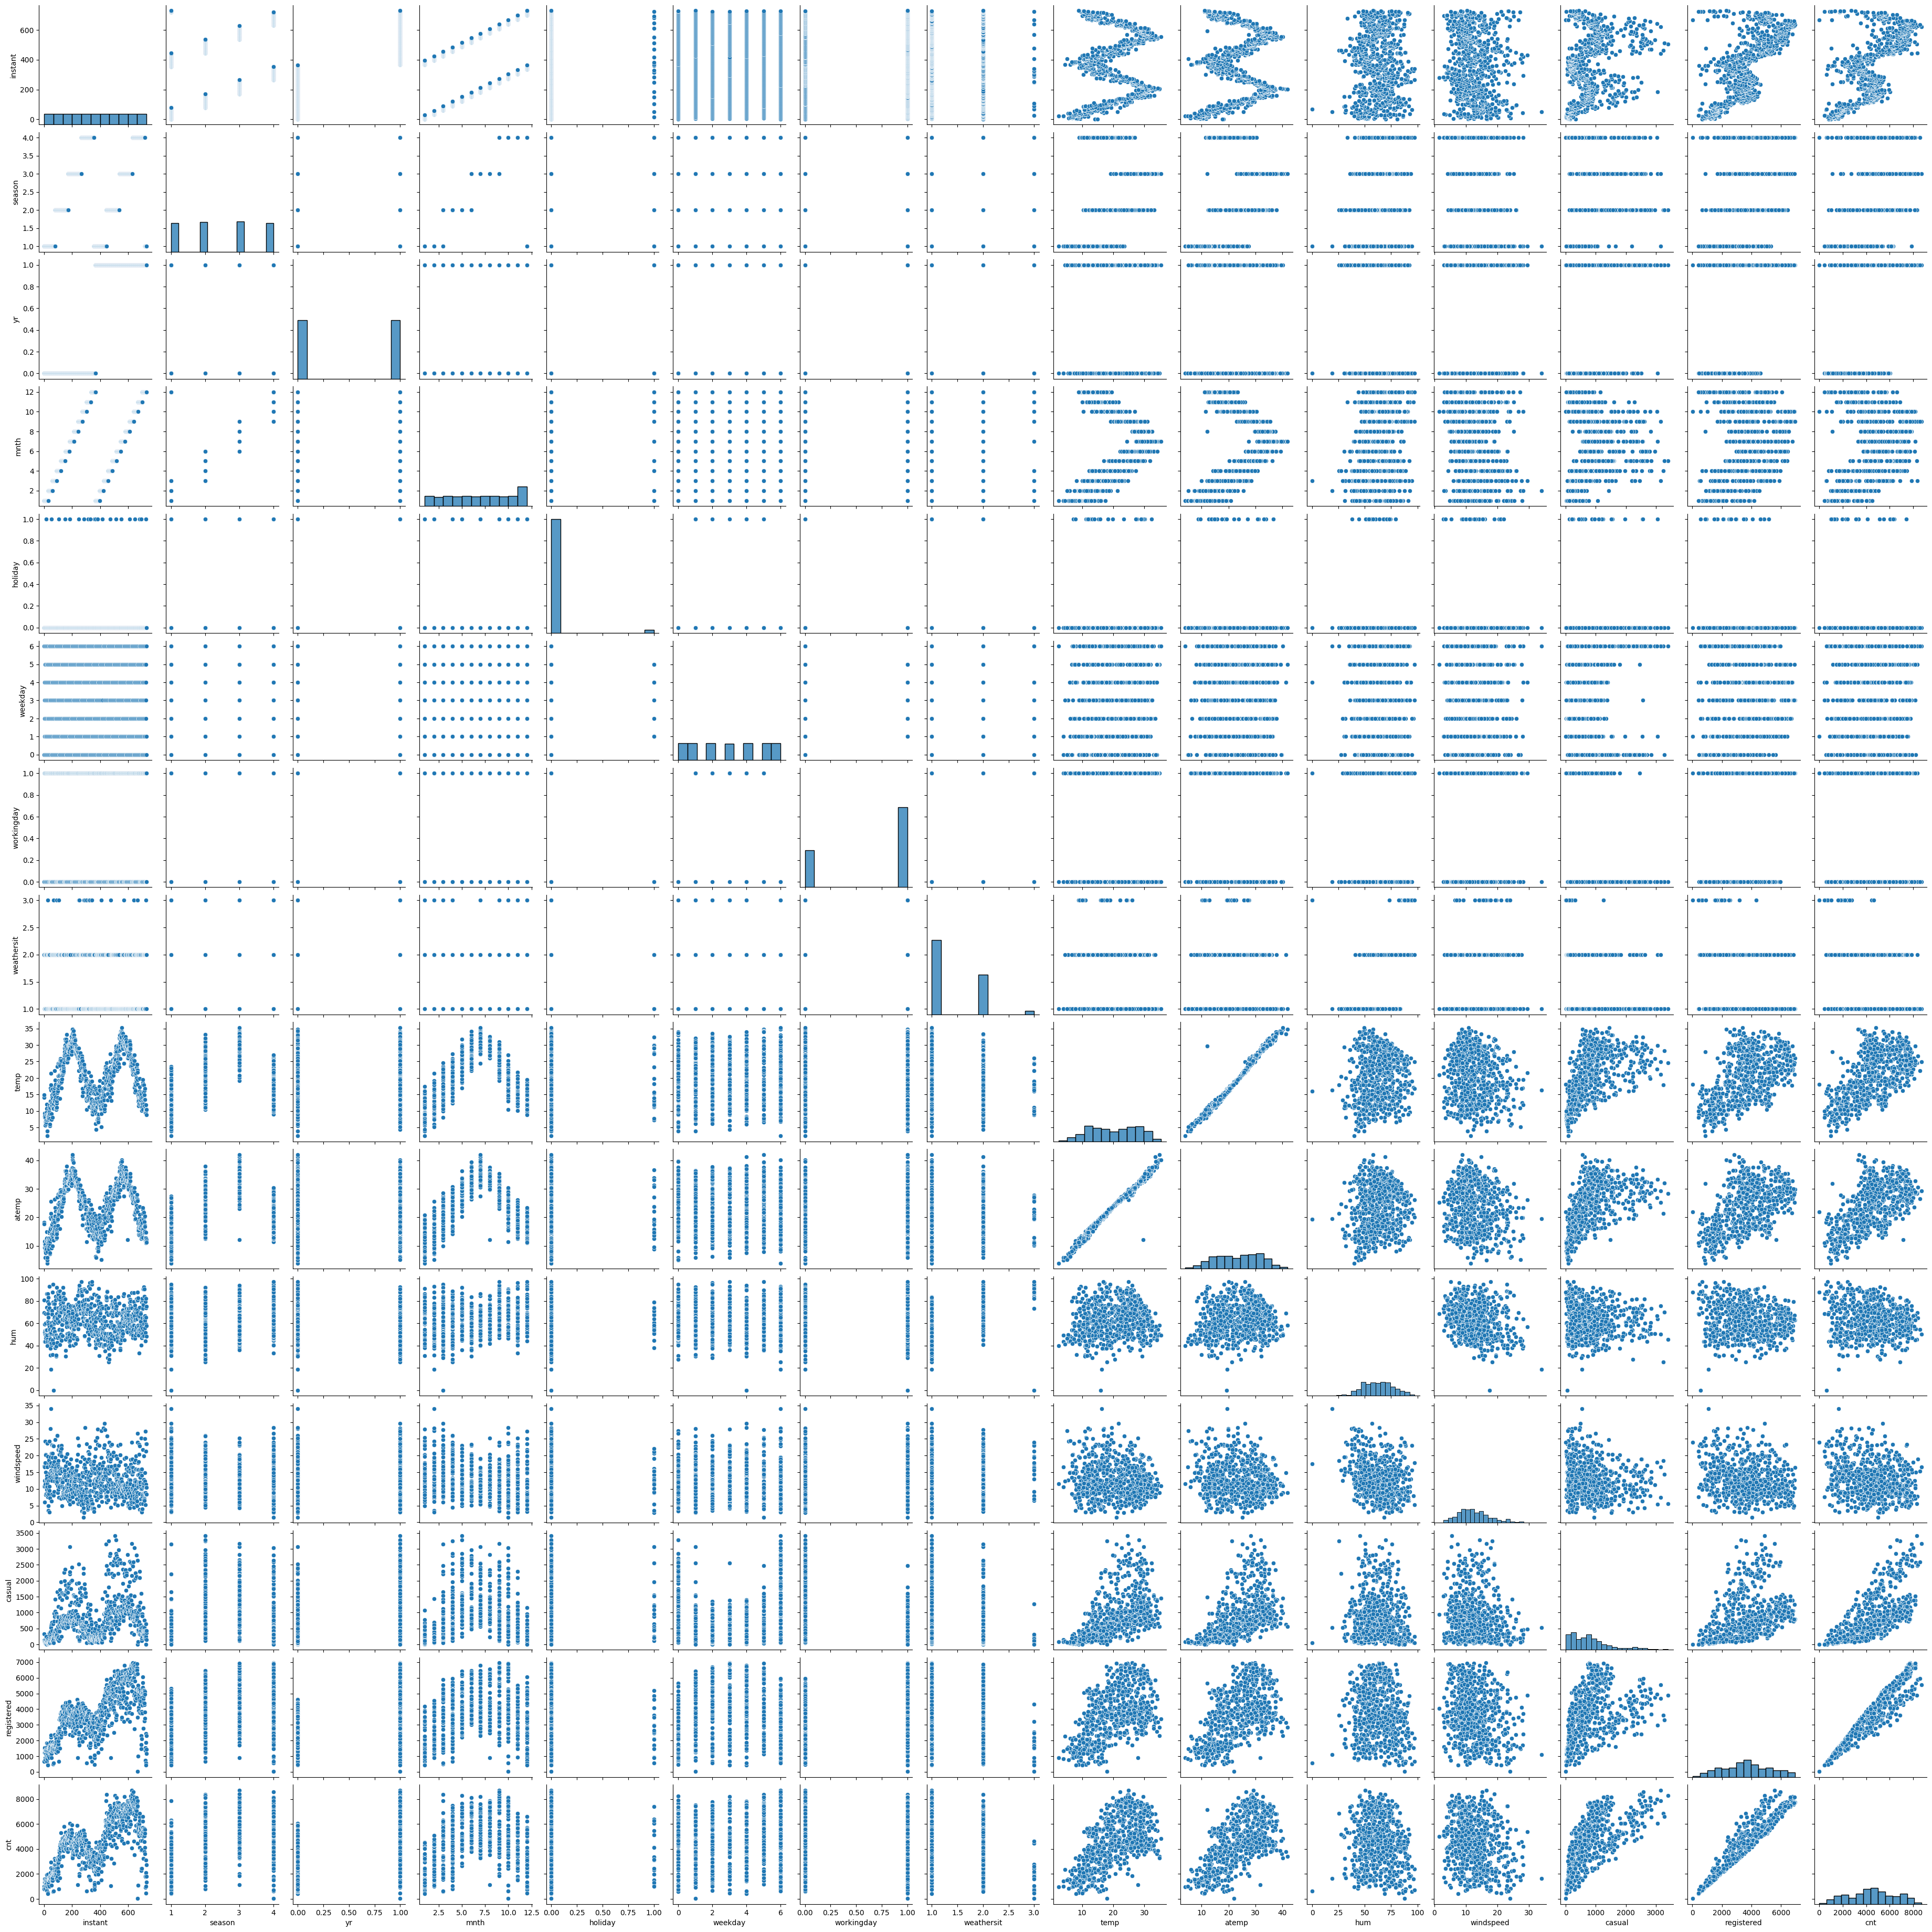

In [4]:
sns.pairplot(bikes)

In [3]:
bikes.shape

(730, 16)

In [ ]:
#Columns Wise Null percentage
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#Row Wise Null percentage
bikes.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

#There is no missing values in the give data

#Cheking Duplicate Values in the given list

In [ ]:
bikes_dupl = bikes.copy()
bikes_dupl.drop_duplicates(subset= None , inplace = True)
bikes_dupl.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [ ]:
bikes_dupl.shape

(730, 16)

In [ ]:
#there were no Duplication in the given list of data
bikes.shape

(730, 16)

In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [ ]:
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [ ]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#Data Cleaning
## Removing Unwanted columns in the list

In [ ]:
bikes.value_counts(ascending = False).head()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
480      25-04-2019  2       1   4     0        3        1           1           19.543347  23.51585  42.7917  7.959064   655     5541        6196    1
482      27-04-2019  2       1   4     0        5        1           1           18.757500  22.63185  40.0833  23.291411  1014    5219        6233    1
483      28-04-2019  2       1   4     0        6        0           2           15.443347  18.87520  48.9583  8.708325   1120    3100        4220    1
484      29-04-2019  2       1   4     0        0        0           1           18.791653  22.50605  58.7083  7.832836   2229    4075        6304    1
Name: count, dtype: int64

* instant is having only index values there is no use to keep in the data set
* dteday having day month and year, already mnth and yr are exited in the seperate columns, we can ignore this column
* casual and registered are combined of CNT value, total number of count will messure through cnt.

In [ ]:
bikes1 = bikes.copy()

dropping = ['instant','dteday','casual','registered']
for i in bikes1.columns:
  if i in dropping:
    bikes1.drop(labels = i , axis = 1 , inplace = True)

bikes1.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [ ]:
bikes.shape

(730, 16)

In [ ]:
bikes1.shape

(730, 12)

#day.csv have the following fields:
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

#Transforming month, season, weathersit and weekdays fields in the columns area


In [ ]:
bikes1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
bikes1['mnth'] = bikes1['mnth'].map({1:'Jan' , 2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July' , 8:'Aug',9:'Sep' , 10:'Oct' , 11:'Nov' , 12:'Dec'})
bikes1['weekday'] = bikes1['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'})
bikes1['season'] = bikes1['season'].map({1:'Spring',2:'Summer',3:'Fall', 4:'Winter'})
bikes1['weathersit'] = bikes1['weathersit'].map({1:'Clear & Partly Cloudy',2:'Mist + Cloudy',3:'Light Snow & Rain',4:'Heavy Rain'})
bikes1.head()

season  yr mnth  holiday weekday  workingday             weathersit  \
0  Spring   0  Jan        0     Sat           0          Mist + Cloudy   
1  Spring   0  Jan        0     Sun           0          Mist + Cloudy   
2  Spring   0  Jan        0     Mon           1  Clear & Partly Cloudy   
3  Spring   0  Jan        0     Tue           1  Clear & Partly Cloudy   
4  Spring   0  Jan        0     Wed           1  Clear & Partly Cloudy   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

In [ ]:
bikes1['weekday'].value_counts()

weekday
Sat     105
Sun     105
Mon     105
Tue     104
Thur    104
Fri     104
Wed     103
Name: count, dtype: int64

In [ ]:
bikes1['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [ ]:
bikes1['weathersit'].value_counts()

weathersit
Clear & Partly Cloudy    463
Mist + Cloudy            246
Light Snow & Rain         21
Name: count, dtype: int64

In [ ]:
bikes1['mnth'].value_counts()

mnth
Jan      62
March    62
May      62
July     62
Aug      62
Oct      62
Dec      62
April    60
June     60
Sep      60
Nov      60
Feb      56
Name: count, dtype: int64

In [ ]:
print(bikes1[['weathersit','mnth','season','weekday']].value_counts())

weathersit             mnth  season  weekday
Clear & Partly Cloudy  July  Fall    Sun        8
                                     Tue        8
                       Nov   Winter  Fri        8
                       Aug   Fall    Wed        8
                       Jan   Spring  Sun        8
                                               ..
Light Snow & Rain      Oct   Winter  Mon        1
                       Nov   Winter  Wed        1
                                     Tue        1
                                     Mon        1
Mist + Cloudy          Sep   Winter  Wed        1
Name: count, Length: 232, dtype: int64


In [ ]:
bikes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#Continues Independent Variables

#Univarient Analysis

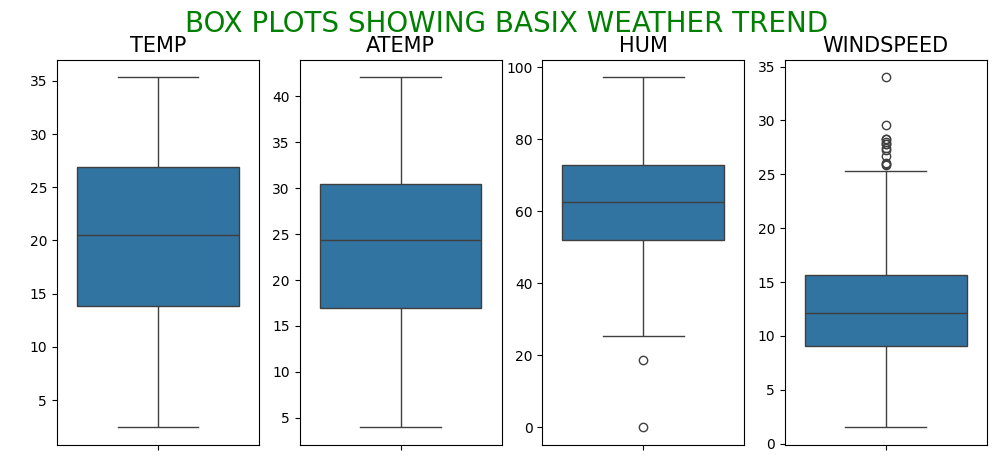

In [ ]:
Cont_var = [i for i in bikes1.select_dtypes(exclude = 'object').columns if bikes1[i].nunique() > 2 and i != 'cnt']
fig , ax = plt.subplots(nrows = 1 , ncols = len(Cont_var) , figsize = (12 , 5))
plt.suptitle('Box Plots showing basix weather trend'.upper() , fontsize = 20 , color = 'green')
for i in range(len(Cont_var)):
    sns.boxplot( y = bikes1[Cont_var[i]] , ax = ax[i])
    ax[i].set_title(f'{Cont_var[i].upper()}' , fontsize = 15)
    ax[i].set_ylabel(' ')

##TEMP is ditributed between 14 to 27 and the median is 21
##ATEMP is distributed between 17 to 31 and the median is 24
## TEMP and ATEMP are normally distributed as compared to HUMIDITY and WINDSPEED

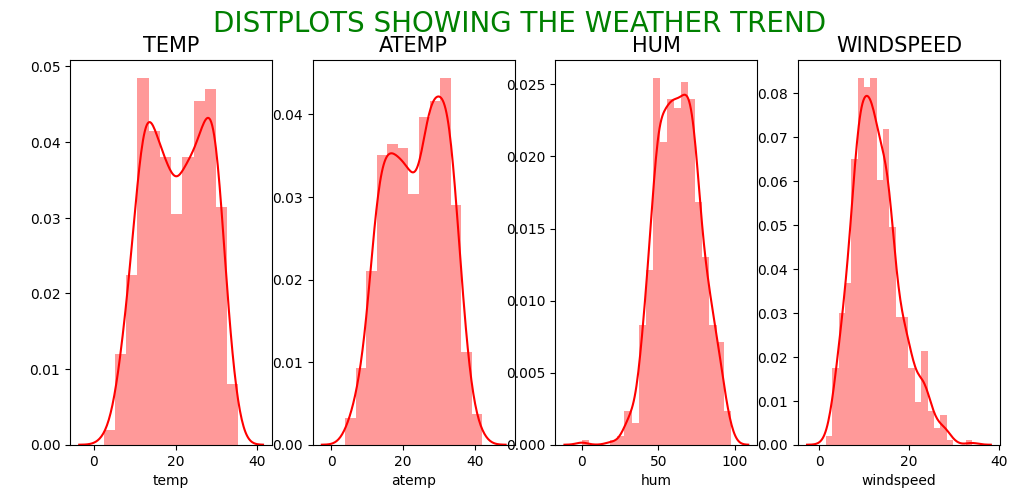

In [ ]:
fig , ax = plt.subplots(nrows = 1 , ncols = len(Cont_var) , figsize = (12 , 5))
plt.suptitle("DistPlots Showing the weather Trend".upper() , fontsize = 20 , color = 'green')
for i in range(len(Cont_var)):
    sns.distplot( bikes1[Cont_var[i]] , ax = ax[i] , color = 'red')
    ax[i].set_title(f'{Cont_var[i].upper()}' , fontsize = 15)
    ax[i].set_ylabel(' ')

Text(0.5, 1.0, 'yr, holiday and Workingday')

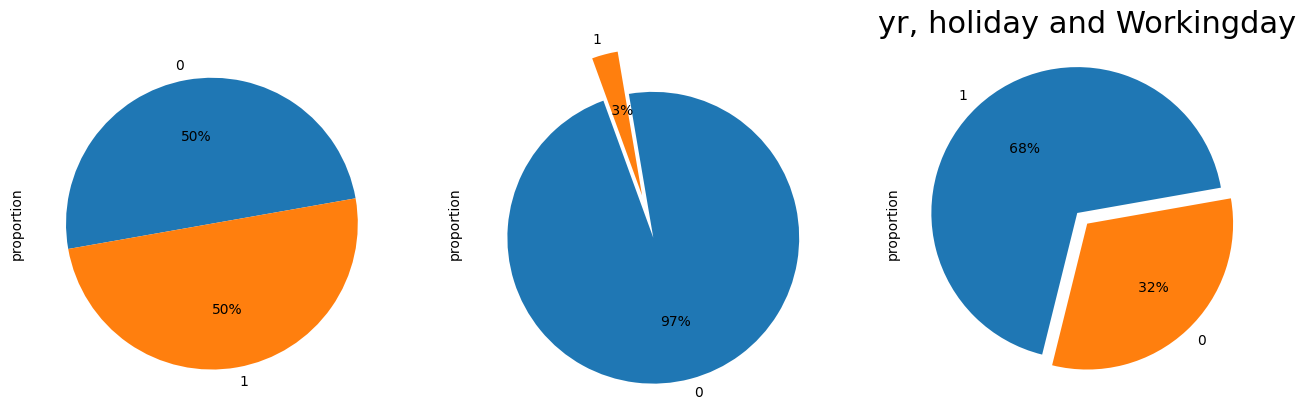

In [ ]:
plt.figure(figsize= ( 16,15))
plt.subplot(1,3,1)
bikes1['yr'].value_counts(normalize = True).plot.pie(autopct = '%1.0f%%' , startangle = 10)
plt.subplot(1,3,2)
bikes1['holiday'].value_counts(normalize = True).plot.pie( explode = (0.1 , 0.2) , autopct = '%2.0f%%' , startangle = 110)
plt.subplot(1,3,3)
bikes1['workingday'].value_counts(normalize = True).plot.pie(explode = (0.1 , 0) , autopct = '%5.0f%%' ,startangle = 10)
plt.title('yr, holiday and Workingday',fontsize = 22)

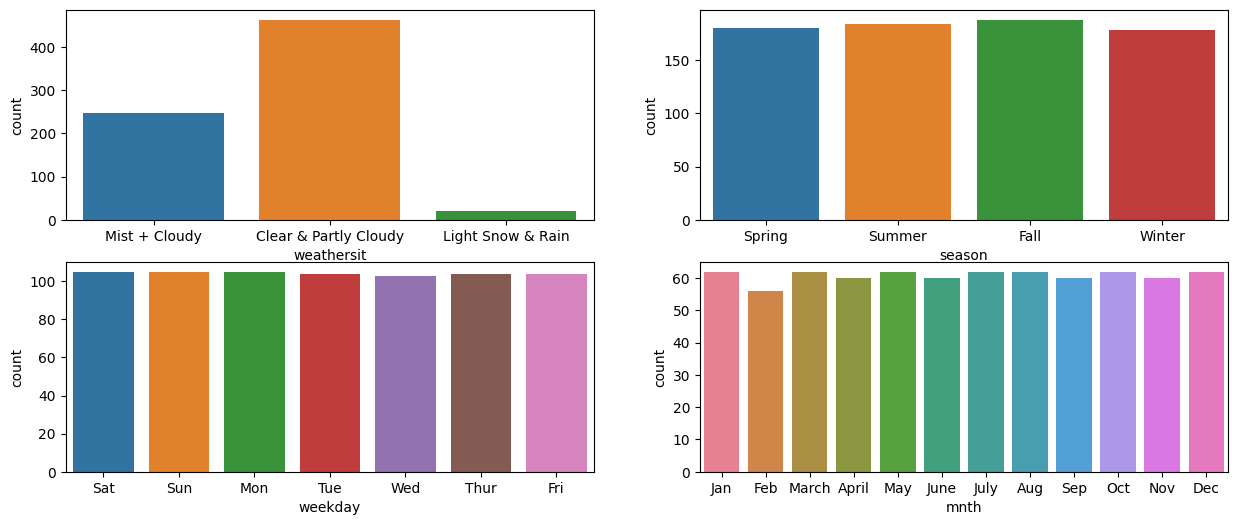

In [ ]:
plt.figure(figsize = [15,6])
plt.subplot(2,2,1)
sns.countplot(data = bikes1, x = 'weathersit' , hue = 'weathersit')
plt.subplot(2,2,2)
sns.countplot(data = bikes1, x = 'season' , hue = 'season')
plt.subplot(2,2,3)
sns.countplot(data = bikes1, x = 'weekday' , hue = 'weekday')
plt.subplot(2,2,4)

sns.countplot(data = bikes1, x = 'mnth' , hue = 'mnth')
plt.show()



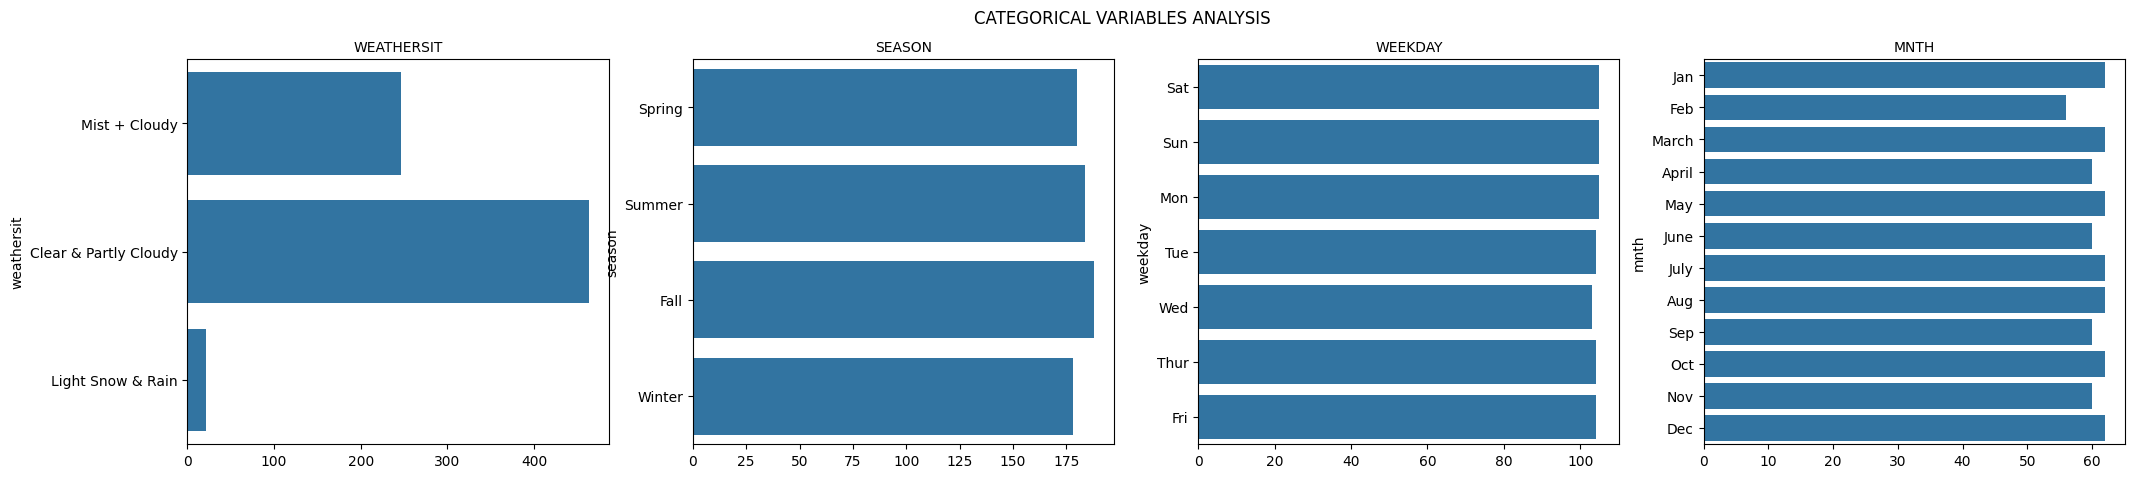

In [ ]:
cat_var = ['weathersit','season','weekday','mnth']
fig , ax = plt.subplots(nrows = 1 , ncols = len(cat_var) , figsize = (25 , 5))
plt.suptitle('Categorical Variables analysis '.upper())
for i in range(len(cat_var)):
  sns.countplot(bikes1[cat_var[i]] , ax = ax[i] )
  ax[i].set_title(f'{cat_var[i].upper()}' , fontsize = 10)
  ax[i].set_xlabel('')

By observing the 3 pi charts we can came to conclusion that
    - 'Yr' is expected to be 50%-50% daily records of bike usage.
    - Significantly less number of holidays(1) as compared to non-holidays(0) hence bike usage is more in 0.
    - The same case applies to 'workingday' due to higher number of days vs non-working days.

#Bivarient Analysis
##Continues independent Variable

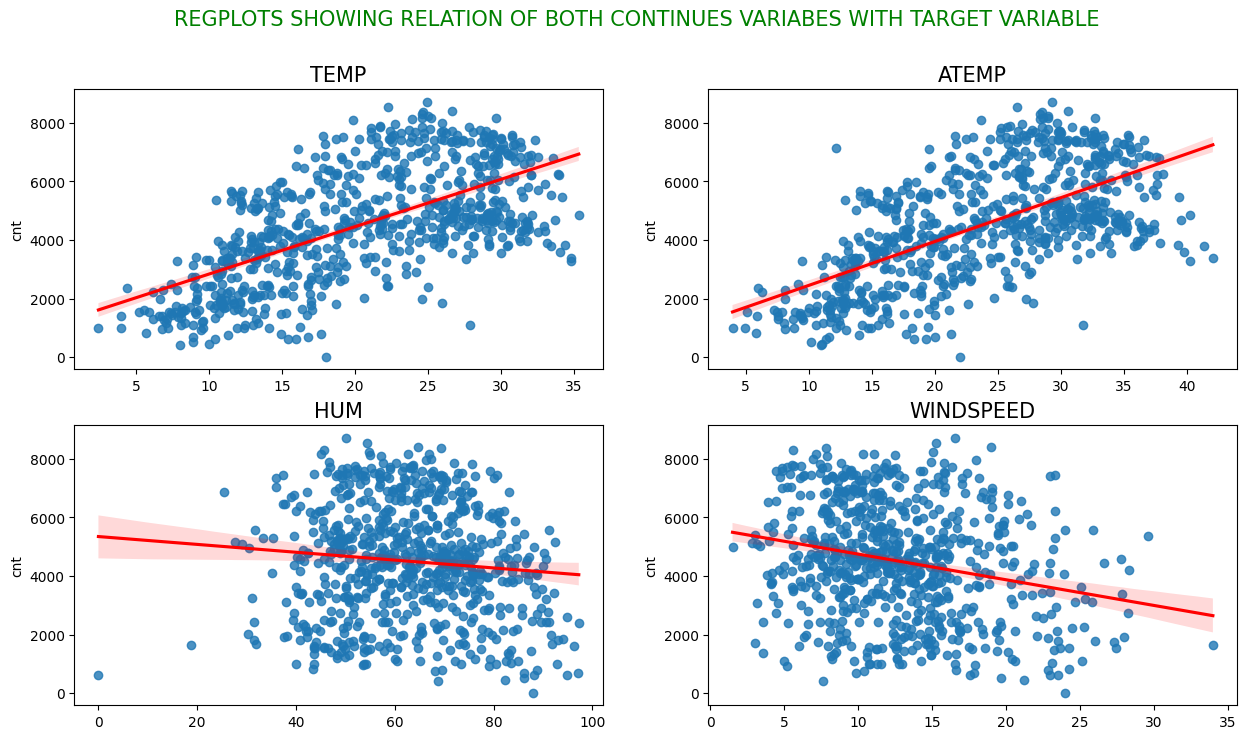

In [ ]:
Cont_var = [i for i in bikes1.select_dtypes(exclude = 'object').columns if bikes[i].nunique() > 2 and i != 'cnt']
fig , ax = plt.subplots(nrows = 2 , ncols = int(len(Cont_var)/2) , figsize = (15 , 8))
plt.suptitle('Regplots showing relation of both Continues variabes with Target Variable'.upper() , fontsize = 15 , color = 'green')
k = 0
for i in range(2):
  for j in range(int(len(Cont_var)/2)):
    sns.regplot( x = bikes1[Cont_var[k]] , y = bikes1['cnt'] , ax = ax[i , j] , line_kws = { 'color' : 'red'})
    ax[i,j].set_title(f'{Cont_var[k].upper()}' , fontsize = 15)
    k+= 1
    ax[i,j].set_xlabel('')


plt.show()

##Both TEMP AND ATEMP are having praportional relationships
##same way HUM and Windspeed are in slightly same relationship

##both 2 are opposite correlated each other

In [ ]:
bikes1.head()

season  yr mnth  holiday weekday  workingday             weathersit  \
0  Spring   0  Jan        0     Sat           0          Mist + Cloudy   
1  Spring   0  Jan        0     Sun           0          Mist + Cloudy   
2  Spring   0  Jan        0     Mon           1  Clear & Partly Cloudy   
3  Spring   0  Jan        0     Tue           1  Clear & Partly Cloudy   
4  Spring   0  Jan        0     Wed           1  Clear & Partly Cloudy   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

#Numerical Variables vs CNT

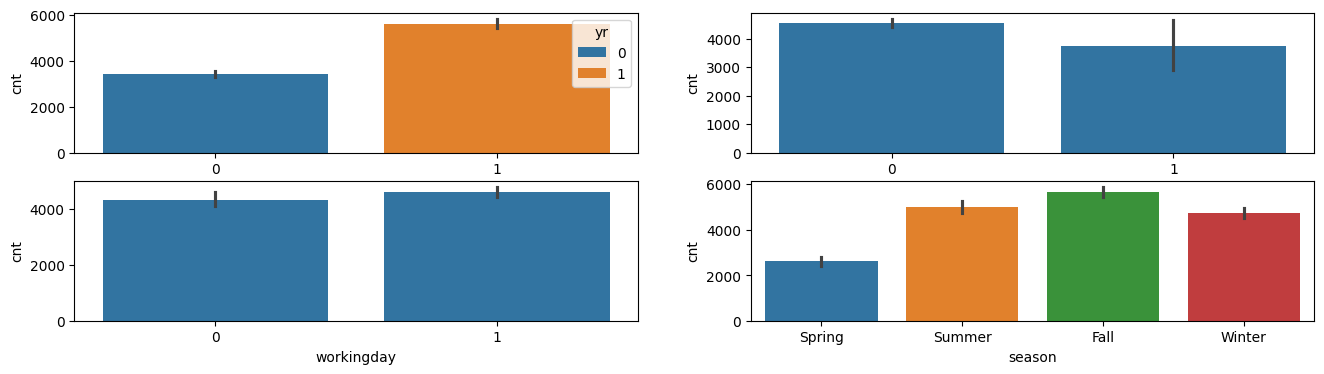

In [ ]:
plt.figure(figsize = (16,4))
plt.subplot(2,2,1)
sns.barplot(x = 'yr', y =  'cnt', data = bikes1 , hue = 'yr')
plt.subplot(2,2,2)
sns.barplot(x = 'holiday', y = 'cnt', data = bikes1)
plt.subplot(2,2,3)
sns.barplot(x = 'workingday', y = 'cnt', data = bikes1)
plt.subplot(2,2,4)
sns.barplot(x = 'season' , y = 'cnt' , data = bikes1 , hue = 'season')
plt.show()

#Categorical Variables with Numerical Variables

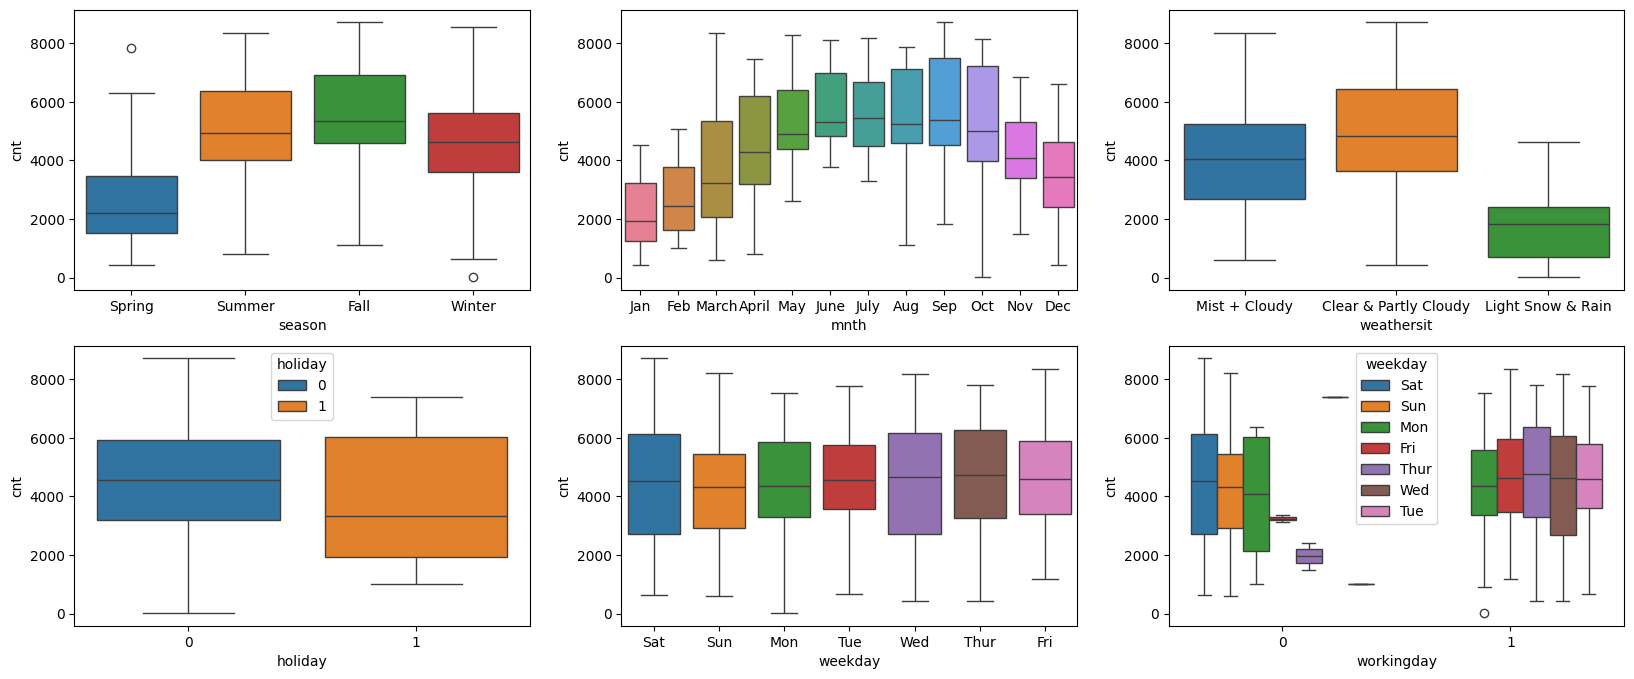

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data =bikes1 , hue = 'season')
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =bikes1 , hue = 'mnth')
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes1, hue = 'weathersit')
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data =bikes1, hue = 'holiday')
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes1 , hue = 'weekday')
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes1 , hue = 'weekday')
plt.show()

In [ ]:
bikes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#Correlation Metrics for Bikes

In [ ]:
bike_new = bikes[['yr','holiday','workingday','temp','atemp', 'hum', 'windspeed','cnt']]
bike_new.head()


yr  holiday  workingday       temp     atemp      hum  windspeed   cnt
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600

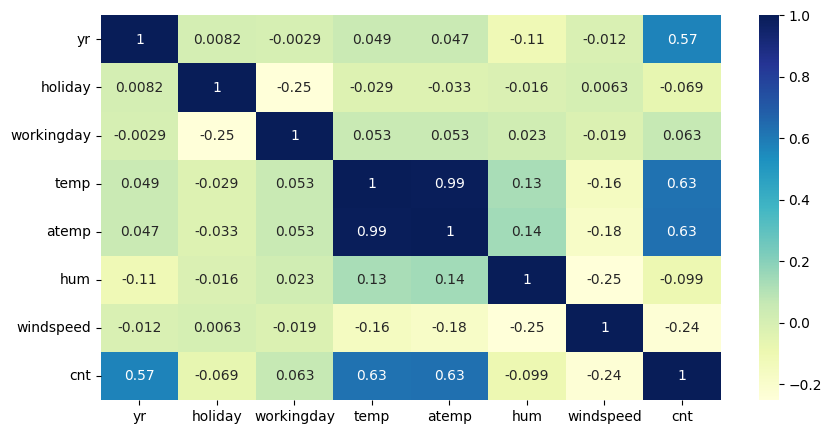

In [ ]:
plt.figure(figsize = (10 , 5))
sns.heatmap(bike_new.corr() , annot = True , cmap = 'YlGnBu')
plt.show()

#Validating different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the above model

In [ ]:
bikes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#Creating Dummy Variable
creating DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
And dropping the first variable for each dummy created variables

In [ ]:
newbike = pd.get_dummies(bikes1 , drop_first = True)
newbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            730 non-null    int64  
 1   holiday                       730 non-null    int64  
 2   workingday                    730 non-null    int64  
 3   temp                          730 non-null    float64
 4   atemp                         730 non-null    float64
 5   hum                           730 non-null    float64
 6   windspeed                     730 non-null    float64
 7   cnt                           730 non-null    int64  
 8   season_Spring                 730 non-null    bool   
 9   season_Summer                 730 non-null    bool   
 10  season_Winter                 730 non-null    bool   
 11  mnth_Aug                      730 non-null    bool   
 12  mnth_Dec                      730 non-null    bool   
 13  mnth_

In [ ]:
newbike.shape

(730, 30)

In [ ]:
newbike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow & Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

#Splitting the Data into Train and Test ( 0.7 and 0.3 )

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split


In [ ]:
df_train , df_test = train_test_split(newbike , train_size = 0.7 , random_state = 100)
df_train.head()

yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
576   1        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426   1        0           0  16.980847  20.6746  62.1250  10.792293  4066   
728   1        0           0  10.489153  11.5850  48.3333  23.500518  1796   
482   1        0           0  15.443347  18.8752  48.9583   8.708325  4220   
111   0        0           1  13.803347  16.0977  72.9583  14.707907  1683   

     season_Spring  season_Summer  ...  mnth_Oct  mnth_Sep  weekday_Mon  \
576          False          False  ...     False     False        False   
426           True          False  ...     False     False        False   
728           True          False  ...     False     False        False   
482          False           True  ...     False     False        False   
111          False           True  ...     False     False        False   

     weekday_Sat  weekday_Sun  weekday_Thur  weekday_Tue  weekday_Wed  \
576        False        False         False         True        False   
426         True        False         False        False        False   
728        False         True         False        False        False   
482         True        False         False        False        False   
111        False        False         False        False        False   

     weathersit_Light Snow & Rain  weathersit_Mist + Cloudy  
576                         False                     False  
426                         False                      True  
728                         False                     False  
482                         False                      True  
111                         False                      True  

[5 rows x 30 columns]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            510 non-null    int64  
 1   holiday                       510 non-null    int64  
 2   workingday                    510 non-null    int64  
 3   temp                          510 non-null    float64
 4   atemp                         510 non-null    float64
 5   hum                           510 non-null    float64
 6   windspeed                     510 non-null    float64
 7   cnt                           510 non-null    int64  
 8   season_Spring                 510 non-null    bool   
 9   season_Summer                 510 non-null    bool   
 10  season_Winter                 510 non-null    bool   
 11  mnth_Aug                      510 non-null    bool   
 12  mnth_Dec                      510 non-null    bool   
 13  mnth_Feb

In [ ]:
df_train['season_Spring'] = df_train['season_Spring'].astype('int')
df_train['season_Summer'] = df_train['season_Summer'].astype('int')
df_train['season_Winter'] = df_train['season_Winter'].astype('int')
df_train['mnth_Jan'] = df_train['mnth_Jan'].astype('int')
df_train['mnth_Feb'] = df_train['mnth_Feb'].astype('int')
df_train['mnth_March'] = df_train['mnth_March'].astype('int')
df_train['mnth_May'] = df_train['mnth_May'].astype('int')
df_train['mnth_June'] = df_train['mnth_June'].astype('int')
df_train['mnth_July'] = df_train['mnth_July'].astype('int')
df_train['mnth_Aug'] = df_train['mnth_Aug'].astype('int')
df_train['mnth_Sep'] = df_train['mnth_Sep'].astype('int')
df_train['mnth_Oct'] = df_train['mnth_Oct'].astype('int')
df_train['mnth_Nov'] = df_train['mnth_Nov'].astype('int')
df_train['mnth_Dec'] = df_train['mnth_Dec'].astype('int')
df_train['weekday_Mon'] = df_train['weekday_Mon'].astype('int')
df_train['weekday_Tue'] = df_train['weekday_Tue'].astype('int')
df_train['weekday_Wed'] = df_train['weekday_Wed'].astype('int')
df_train['weekday_Thur'] = df_train['weekday_Thur'].astype('int')
df_train['weekday_Sat'] = df_train['weekday_Sat'].astype('int')
df_train['weekday_Sun'] = df_train['weekday_Sun'].astype('int')
df_train['weathersit_Light Snow & Rain'] = df_train['weathersit_Light Snow & Rain'].astype('int')
df_train['weathersit_Mist + Cloudy'] = df_train['weathersit_Mist + Cloudy'].astype('int')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            510 non-null    int64  
 1   holiday                       510 non-null    int64  
 2   workingday                    510 non-null    int64  
 3   temp                          510 non-null    float64
 4   atemp                         510 non-null    float64
 5   hum                           510 non-null    float64
 6   windspeed                     510 non-null    float64
 7   cnt                           510 non-null    int64  
 8   season_Spring                 510 non-null    int64  
 9   season_Summer                 510 non-null    int64  
 10  season_Winter                 510 non-null    int64  
 11  mnth_Aug                      510 non-null    int64  
 12  mnth_Dec                      510 non-null    int64  
 13  mnth_Feb

In [ ]:
df_train.shape

(510, 30)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            220 non-null    int64  
 1   holiday                       220 non-null    int64  
 2   workingday                    220 non-null    int64  
 3   temp                          220 non-null    float64
 4   atemp                         220 non-null    float64
 5   hum                           220 non-null    float64
 6   windspeed                     220 non-null    float64
 7   cnt                           220 non-null    int64  
 8   season_Spring                 220 non-null    bool   
 9   season_Summer                 220 non-null    bool   
 10  season_Winter                 220 non-null    bool   
 11  mnth_Aug                      220 non-null    bool   
 12  mnth_Dec                      220 non-null    bool   
 13  mnth_Feb

In [ ]:
df_test['season_Spring'] = df_test['season_Spring'].astype('int')
df_test['season_Summer'] = df_test['season_Summer'].astype('int')
df_test['season_Winter'] = df_test['season_Winter'].astype('int')
df_test['mnth_Jan'] = df_test['mnth_Jan'].astype('int')
df_test['mnth_Feb'] = df_test['mnth_Feb'].astype('int')
df_test['mnth_March'] = df_test['mnth_March'].astype('int')
df_test['mnth_May'] = df_test['mnth_May'].astype('int')
df_test['mnth_June'] = df_test['mnth_June'].astype('int')
df_test['mnth_July'] = df_test['mnth_July'].astype('int')
df_test['mnth_Aug'] = df_test['mnth_Aug'].astype('int')
df_test['mnth_Sep'] = df_test['mnth_Sep'].astype('int')
df_test['mnth_Oct'] = df_test['mnth_Oct'].astype('int')
df_test['mnth_Nov'] = df_test['mnth_Nov'].astype('int')
df_test['mnth_Dec'] = df_test['mnth_Dec'].astype('int')
df_test['weekday_Mon'] = df_test['weekday_Mon'].astype('int')
df_test['weekday_Tue'] = df_test['weekday_Tue'].astype('int')
df_test['weekday_Wed'] = df_test['weekday_Wed'].astype('int')
df_test['weekday_Thur'] = df_test['weekday_Thur'].astype('int')
df_test['weekday_Sat'] = df_test['weekday_Sat'].astype('int')
df_test['weekday_Sun'] = df_test['weekday_Sun'].astype('int')
df_test['weathersit_Light Snow & Rain'] = df_test['weathersit_Light Snow & Rain'].astype('int')
df_test['weathersit_Mist + Cloudy'] = df_test['weathersit_Mist + Cloudy'].astype('int')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            220 non-null    int64  
 1   holiday                       220 non-null    int64  
 2   workingday                    220 non-null    int64  
 3   temp                          220 non-null    float64
 4   atemp                         220 non-null    float64
 5   hum                           220 non-null    float64
 6   windspeed                     220 non-null    float64
 7   cnt                           220 non-null    int64  
 8   season_Spring                 220 non-null    int64  
 9   season_Summer                 220 non-null    int64  
 10  season_Winter                 220 non-null    int64  
 11  mnth_Aug                      220 non-null    int64  
 12  mnth_Dec                      220 non-null    int64  
 13  mnth_Feb

In [ ]:
df_test.shape

(220, 30)

In [ ]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow & Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

#Pair Plot of all numerical Values

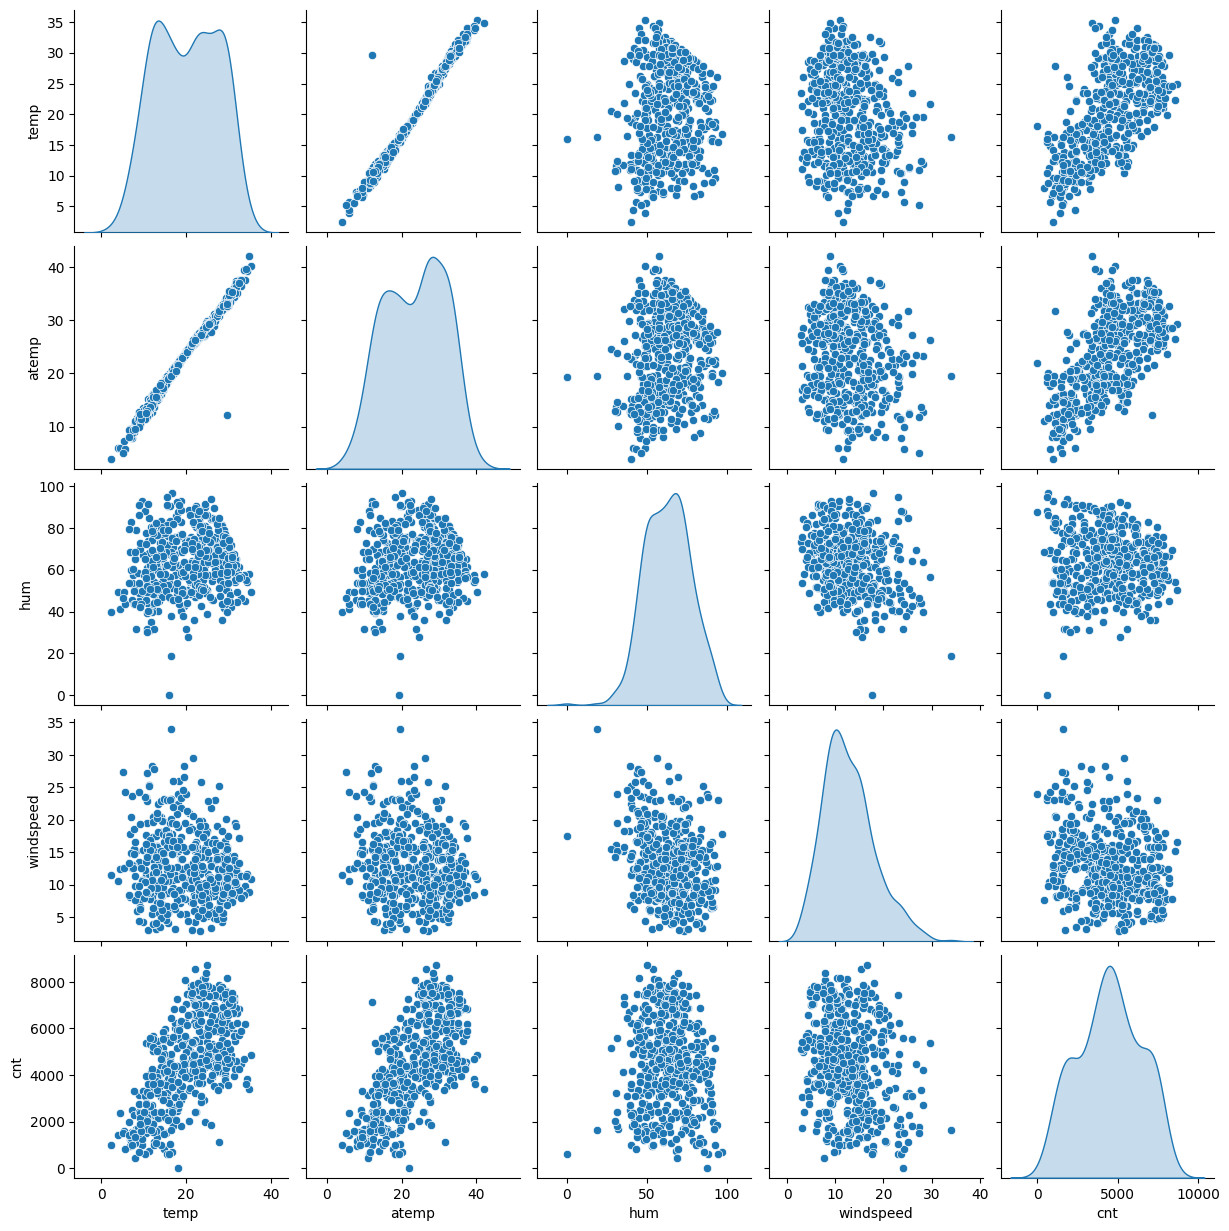

In [ ]:
NewBikes =df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(NewBikes , diag_kind = 'kde')
plt.show()

#As per the above pairplot there is relation between Temp and ATemp with CNT

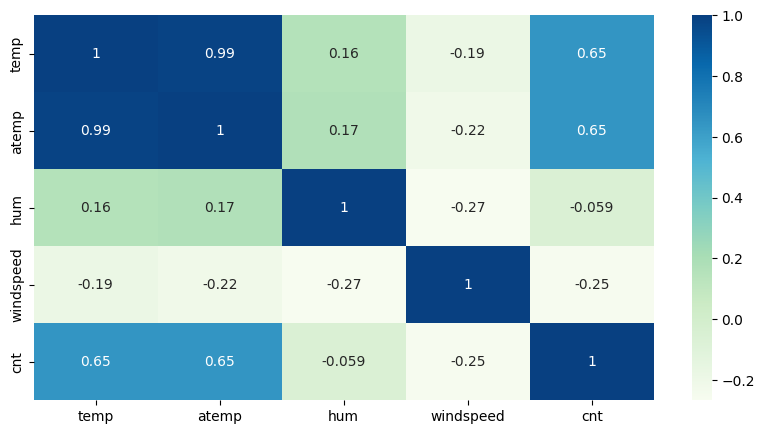

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(NewBikes.corr(), annot = True, cmap="GnBu")
plt.show()

#Heatmap shows us the correlation is hight inbetween temp atemp and cnt

#Rescaling the Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
df_train.head()

yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
576   1        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426   1        0           0  16.980847  20.6746  62.1250  10.792293  4066   
728   1        0           0  10.489153  11.5850  48.3333  23.500518  1796   
482   1        0           0  15.443347  18.8752  48.9583   8.708325  4220   
111   0        0           1  13.803347  16.0977  72.9583  14.707907  1683   

     season_Spring  season_Summer  ...  mnth_Oct  mnth_Sep  weekday_Mon  \
576              0              0  ...         0         0            0   
426              1              0  ...         0         0            0   
728              1              0  ...         0         0            0   
482              0              1  ...         0         0            0   
111              0              1  ...         0         0            0   

     weekday_Sat  weekday_Sun  weekday_Thur  weekday_Tue  weekday_Wed  \
576            0            0             0            1            0   
426            1            0             0            0            0   
728            0            1             0            0            0   
482            1            0             0            0            0   
111            0            0             0            0            0   

     weathersit_Light Snow & Rain  weathersit_Mist + Cloudy  
576                             0                         0  
426                             0                         1  
728                             0                         0  
482                             0                         1  
111                             0                         1  

[5 rows x 30 columns]

In [ ]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow & Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

#Applying Scaler() to all the numerical values

In [ ]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = Scaler.fit_transform(df_train[num_vars])


In [ ]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  season_Spring  season_Summer  ...  mnth_Oct  mnth_Sep  \
576  0.827658              0              0  ...         0         0   
426  0.465255              1              0  ...         0         0   
728  0.204096              1              0  ...         0         0   
482  0.482973              0              1  ...         0         0   
111  0.191095              0              1  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  weekday_Tue  \
576            0            0            0             0            1   
426            0            1            0             0            0   
728            0            0            1             0            0   
482            0            1            0             0            0   
111            0            0            0             0            0   

     weekday_Wed  weathersit_Light Snow & Rain  weathersit_Mist + Cloudy  
576            0                             0                         0  
426            0                             0                         1  
728            0                             0                         0  
482            0                             0                         1  
111            0                             0                         1  

[5 rows x 30 columns]

In [ ]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt  season_Spring  season_Summer  ...    mnth_Oct  \
count  510.000000  510.000000     510.000000     510.000000  ...  510.000000   
mean     0.320883    0.513499       0.243137       0.247059  ...    0.084314   
std      0.169803    0.224421       0.429398       0.431725  ...    0.278131   
min      0.000000    0.000000       0.000000       0.000000  ...    0.000000   
25%      0.199179    0.356420       0.000000       0.000000  ...    0.000000   
50%      0.296763    0.518638       0.000000       0.000000  ...    0.000000   
75%      0.414447    0.684710       0.000000       0.000000  ...    0.000000   
max      1.000000    1.000000       1.000000       1.000000  ...    1.000000   

         mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  \
count  510.000000   510.000000   510.000000   510.000000    510.000000   
mean     0.080392     0.150980     0.154902     0.143137      0.133333   
std      0.272166     0.358381     0.362166     0.350557      0.340268   
min      0.000000     0.000000     0.000000     0.000000      0.000000   
25%      0.000000     0.000000     0.000000     0.000000      0.000000   
50%      0.000000     0.000000     0.000000     0.000000      0.000000   
75%      0.000000     0.000000     0.000000     0.000000      0.000000   
max      1.000000     1.000000     1.000000     1.000000      1.000000   

       weekday_Tue  weekday_Wed  weathersit_Light Snow & Rain  \
count   510.000000   510.000000                    510.000000   
mean      0.131373     0.158824                      0.029412   
std       0.338139     0.365870                      0.169124   
min       0.000000     0.000000                      0.000000   
25%       0.000000     0.000000                      0.000000   
50%       0.000000     0.000000                      0.000000   
75%       0.000000     0.000000                      0.000000   
max       1.000000     1.000000                      1.000000   

       weathersit_Mist + Cloudy  
count                510.000000  
mean                   0.345098  
std                    0.475867  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    1.000000  
max                    1.000000  

[8 rows x 30 columns]

#Building Linear Regression Model
## Dividing into x and y sets for the model building

In [ ]:
y_train = df_train.pop('cnt')
x_train = df_train
x_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

     season_Spring  season_Summer  season_Winter  ...  mnth_Oct  mnth_Sep  \
576              0              0              0  ...         0         0   
426              1              0              0  ...         0         0   
728              1              0              0  ...         0         0   
482              0              1              0  ...         0         0   
111              0              1              0  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  weekday_Tue  \
576            0            0            0             0            1   
426            0            1            0             0            0   
728            0            0            1             0            0   
482            0            1            0             0            0   
111            0            0            0             0            0   

     weekday_Wed  weathersit_Light Snow & Rain  weathersit_Mist + Cloudy  
576            0                             0                         0  
426            0                             0                         1  
728            0                             0                         0  
482            0                             0                         1  
111            0                             0                         1  

[5 rows x 29 columns]

In [ ]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow & Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [ ]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [ ]:
#Importing RFE and LinearRegression model for the library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

rfe = RFE(lr) # we are running RFE here
rfe = rfe.fit(x_train, y_train)

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 15),
 ('mnth_March', False, 16),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 9),
 ('weekday_Thur', False, 12),
 ('weekday_Tue', False, 11),
 ('weekday_Wed', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [ ]:
cols = x_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_July',
       'mnth_Sep', 'weekday_Sat', 'weathersit_Light Snow & Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [ ]:
x_train.columns[~ rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thur', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [ ]:
# Creating x_test dataframe with RFE selected variables
x_train_rfe = x_train[cols]

#<span style = 'color : Green' > Building Linear Model using STATS Models

#Model 1

In [ ]:
#VIF Check

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4                            hum  28.46
3                           temp  16.98
2                     workingday   5.28
5                      windspeed   4.72
6                  season_Spring   4.24
8                  season_Winter   3.42
7                  season_Summer   2.85
13      weathersit_Mist + Cloudy   2.29
0                             yr   2.08
11                   weekday_Sat   1.97
9                      mnth_July   1.58
10                      mnth_Sep   1.39
12  weathersit_Light Snow & Rain   1.24
1                        holiday   1.17

In [ ]:
import statsmodels.api as sm

In [ ]:
# Add a constant
x_train_lm1 = sm.add_constant(x_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, x_train_lm1).fit()

In [ ]:
lr1.params

const                           0.240163
yr                              0.229763
holiday                        -0.059083
workingday                      0.043033
temp                            0.527708
hum                            -0.161086
windspeed                      -0.180875
season_Spring                  -0.055546
season_Summer                   0.053733
season_Winter                   0.099214
mnth_July                      -0.054616
mnth_Sep                        0.081983
weekday_Sat                     0.053031
weathersit_Light Snow & Rain   -0.245009
weathersit_Mist + Cloudy       -0.056344
dtype: float64

In [ ]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.11e-191
Time:                        11:03:45   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#Model 2


In [ ]:
#Removing HUM Value having high VIF Value

x_train_new = x_train_rfe.drop('hum' , axis = 1)
x_train_new.head()


yr  holiday  workingday      temp  windspeed  season_Spring  \
576   1        0           1  0.815169   0.264686              0   
426   1        0           0  0.442393   0.255342              1   
728   1        0           0  0.245101   0.663106              1   
482   1        0           0  0.395666   0.188475              0   
111   0        0           1  0.345824   0.380981              0   

     season_Summer  season_Winter  mnth_July  mnth_Sep  weekday_Sat  \
576              0              0          1         0            0   
426              0              0          0         0            1   
728              0              0          0         0            0   
482              1              0          0         0            1   
111              1              0          0         0            0   

     weathersit_Light Snow & Rain  weathersit_Mist + Cloudy  
576                             0                         0  
426                             0                         1  
728                             0                         0  
482                             0                         1  
111                             0                         1

VIF Check 2

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                           temp  6.97
2                     workingday  5.20
4                      windspeed  4.65
5                  season_Spring  2.49
6                  season_Summer  2.34
0                             yr  2.07
7                  season_Winter  1.98
10                   weekday_Sat  1.96
8                      mnth_July  1.58
12      weathersit_Mist + Cloudy  1.57
9                       mnth_Sep  1.35
1                        holiday  1.17
11  weathersit_Light Snow & Rain  1.09

In [ ]:
x_train_lm2 = sm.add_constant(x_train_new)
lr2 = sm.OLS(y_train, x_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.28e-188
Time:                        11:04:13   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#Model 3

#removing Workingday variable in the given list having high VIF Value

In [ ]:
x_train_new2 = x_train_new.drop('workingday' , axis = 1)
x_train_new2.head()

yr  holiday      temp  windspeed  season_Spring  season_Summer  \
576   1        0  0.815169   0.264686              0              0   
426   1        0  0.442393   0.255342              1              0   
728   1        0  0.245101   0.663106              1              0   
482   1        0  0.395666   0.188475              0              1   
111   0        0  0.345824   0.380981              0              1   

     season_Winter  mnth_July  mnth_Sep  weekday_Sat  \
576              0          1         0            0   
426              0          0         0            1   
728              0          0         0            0   
482              0          0         0            1   
111              0          0         0            0   

     weathersit_Light Snow & Rain  weathersit_Mist + Cloudy  
576                             0                         0  
426                             0                         1  
728                             0                         0  
482                             0                         1  
111                             0                         1

##VIF Check


In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train_new2.columns
vif['VIF'] = [variance_inflation_factor(x_train_new2.values, i) for i in range(x_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                           temp  5.12
3                      windspeed  4.62
5                  season_Summer  2.23
4                  season_Spring  2.10
0                             yr  2.07
6                  season_Winter  1.79
7                      mnth_July  1.58
11      weathersit_Mist + Cloudy  1.55
8                       mnth_Sep  1.34
9                    weekday_Sat  1.19
10  weathersit_Light Snow & Rain  1.08
1                        holiday  1.05

In [ ]:
x_train_lm3 = sm.add_constant(x_train_new2)
lr3 = sm.OLS(y_train, x_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.68e-186
Time:                        11:05:23   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#Model 4


In [ ]:
#Removing weekday_Sat having high P value

In [ ]:
x_train_new3 = x_train_new2.drop('weekday_Sat' , axis = 1)
x_train_new3.head()

yr  holiday      temp  windspeed  season_Spring  season_Summer  \
576   1        0  0.815169   0.264686              0              0   
426   1        0  0.442393   0.255342              1              0   
728   1        0  0.245101   0.663106              1              0   
482   1        0  0.395666   0.188475              0              1   
111   0        0  0.345824   0.380981              0              1   

     season_Winter  mnth_July  mnth_Sep  weathersit_Light Snow & Rain  \
576              0          1         0                             0   
426              0          0         0                             0   
728              0          0         0                             0   
482              0          0         0                             0   
111              0          0         0                             0   

     weathersit_Mist + Cloudy  
576                         0  
426                         1  
728                         0  
482                         1  
111                         1

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train_new3.columns
vif['VIF'] = [variance_inflation_factor(x_train_new3.values, i) for i in range(x_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                           temp  5.09
3                      windspeed  4.60
5                  season_Summer  2.23
4                  season_Spring  2.08
0                             yr  2.07
6                  season_Winter  1.78
7                      mnth_July  1.58
10      weathersit_Mist + Cloudy  1.55
8                       mnth_Sep  1.34
9   weathersit_Light Snow & Rain  1.08
1                        holiday  1.04

In [ ]:
x_train_lr4 = sm.add_constant(x_train_new3)
lr4 = sm.OLS(y_train, x_train_lr4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          5.06e-187
Time:                        11:05:37   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#Model 5


##Removing mnth_July having high VIF Value

In [ ]:
x_train_new4 = x_train_new3.drop('mnth_July', axis = 1)
x_train_new4.head()

yr  holiday      temp  windspeed  season_Spring  season_Summer  \
576   1        0  0.815169   0.264686              0              0   
426   1        0  0.442393   0.255342              1              0   
728   1        0  0.245101   0.663106              1              0   
482   1        0  0.395666   0.188475              0              1   
111   0        0  0.345824   0.380981              0              1   

     season_Winter  mnth_Sep  weathersit_Light Snow & Rain  \
576              0         0                             0   
426              0         0                             0   
728              0         0                             0   
482              0         0                             0   
111              0         0                             0   

     weathersit_Mist + Cloudy  
576                         0  
426                         1  
728                         0  
482                         1  
111                         1

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train_new4.columns
vif['VIF'] = [variance_inflation_factor(x_train_new4.values, i) for i in range(x_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                     windspeed  4.60
2                          temp  3.84
0                            yr  2.07
4                 season_Spring  1.99
5                 season_Summer  1.90
6                 season_Winter  1.63
9      weathersit_Mist + Cloudy  1.55
7                      mnth_Sep  1.23
8  weathersit_Light Snow & Rain  1.08
1                       holiday  1.04

In [ ]:
x_train_lr5 = sm.add_constant(x_train_new4)
lr5 = sm.OLS(y_train, x_train_lr5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          1.47e-186
Time:                        11:05:54   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#Model 6


##Removing season_Spring having high P value

In [ ]:
x_train_new5 = x_train_new4.drop('season_Spring' , axis = 1)
x_train_new5.head()

yr  holiday      temp  windspeed  season_Summer  season_Winter  mnth_Sep  \
576   1        0  0.815169   0.264686              0              0         0   
426   1        0  0.442393   0.255342              0              0         0   
728   1        0  0.245101   0.663106              0              0         0   
482   1        0  0.395666   0.188475              1              0         0   
111   0        0  0.345824   0.380981              1              0         0   

     weathersit_Light Snow & Rain  weathersit_Mist + Cloudy  
576                             0                         0  
426                             0                         1  
728                             0                         0  
482                             0                         1  
111                             0                         1

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x_train_new5.columns
vif['VIF'] = [variance_inflation_factor(x_train_new5.values, i) for i in range(x_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                          temp  3.68
3                     windspeed  3.06
0                            yr  2.00
4                 season_Summer  1.57
8      weathersit_Mist + Cloudy  1.48
5                 season_Winter  1.37
6                      mnth_Sep  1.20
7  weathersit_Light Snow & Rain  1.08
1                       holiday  1.04

In [ ]:
x_train_lr6 = sm.add_constant(x_train_new5)
lr6 = sm.OLS(y_train , x_train_lr6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.83e-186
Time:                        11:06:07   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#all the predicted and Pvalues and VIF values are significant

#Final Model for LinearRegression
Hypothesis Testing:<br>
Hypothesis testing states that:<br>

H0:B1=B2=...=Bn=0<br>
H1: at least one Bi!=0

Model 6 Lr6 Coefficients

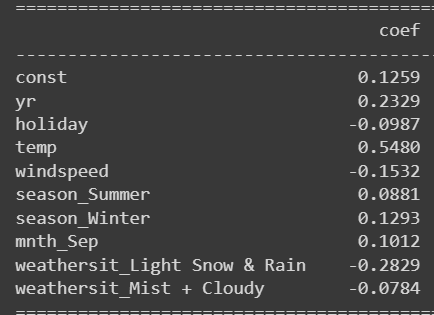

## The equation of best fitted surface based on model lr6:

CNT = 0.1259 + (yr * 0.2329) - (holiday * 0.0987) + (temp * 0.5480) - (windspeed * 0.1532 ) + (season_Summer  * 0.0881 ) + (season_Winter * 0.1293) + (mnth_Sep *0.1012) - (weathersit_Light Snow & Rain* 0.2829 ) - (weathersit_Mist + Cloudy *0.0784)

#Assumptions

In [ ]:
y_train_pred = lr6.predict(x_train_lr6)

Text(0.5, 0, 'Errors')

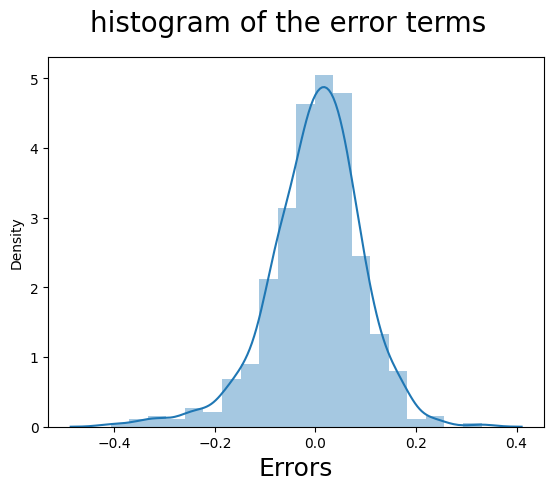

In [ ]:
 res = y_train-y_train_pred

fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('histogram of the error terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#There is a linear relationship between X and Y

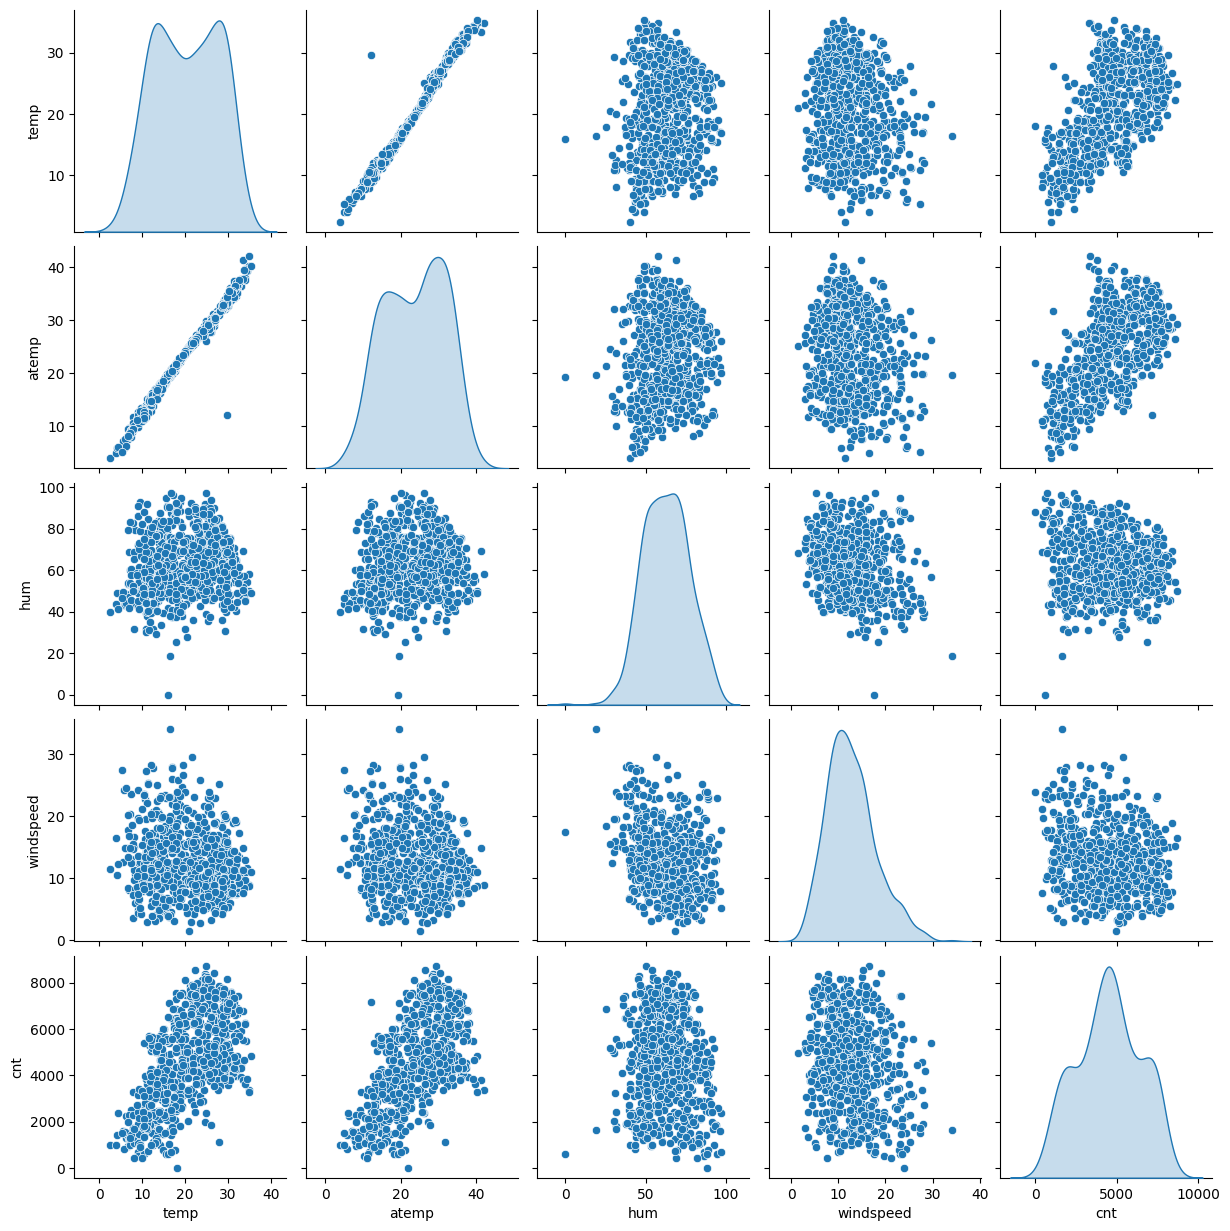

In [ ]:
bike_new = bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_new, diag_kind='kde')
plt.show()

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_new5.columns
vif['VIF'] = [variance_inflation_factor(x_train_new5.values, i) for i in range(x_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                          temp  3.68
3                     windspeed  3.06
0                            yr  2.00
4                 season_Summer  1.57
8      weathersit_Mist + Cloudy  1.48
5                 season_Winter  1.37
6                      mnth_Sep  1.20
7  weathersit_Light Snow & Rain  1.08
1                       holiday  1.04

#MAKING PREDICTION USING FINAL MODEL USING TEST MODEL

In [ ]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = Scaler.transform(df_test[num_vars])

In [ ]:
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  season_Spring  season_Summer  ...  mnth_Oct  mnth_Sep  \
184  0.692706              0              0  ...         0         0   
535  0.712034              0              1  ...         0         0   
299  0.303382              0              0  ...         1         0   
221  0.547400              0              0  ...         0         0   
152  0.569029              0              1  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  weekday_Tue  \
184            1            0            0             0            0   
535            0            0            0             0            0   
299            0            0            0             1            0   
221            0            0            0             0            0   
152            0            0            0             1            0   

     weekday_Wed  weathersit_Light Snow & Rain  weathersit_Mist + Cloudy  
184            0                             0                         1  
535            1                             0                         0  
299            0                             0                         1  
221            1                             0                         0  
152            0                             0                         0  

[5 rows x 30 columns]

In [ ]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt  season_Spring  season_Summer  ...    mnth_Oct  \
count  220.000000  220.000000     220.000000     220.000000  ...  220.000000   
mean     0.313293    0.522154       0.254545       0.263636  ...    0.086364   
std      0.159584    0.219163       0.436599       0.441609  ...    0.281541   
min     -0.042808    0.048205       0.000000       0.000000  ...    0.000000   
25%      0.198843    0.378595       0.000000       0.000000  ...    0.000000   
50%      0.300126    0.524678       0.000000       0.000000  ...    0.000000   
75%      0.402718    0.677750       1.000000       1.000000  ...    0.000000   
max      0.807474    0.963300       1.000000       1.000000  ...    1.000000   

         mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  \
count  220.000000   220.000000   220.000000   220.000000    220.000000   
mean     0.086364     0.127273     0.118182     0.145455      0.163636   
std      0.281541     0.334038     0.323559     0.353363      0.370789   
min      0.000000     0.000000     0.000000     0.000000      0.000000   
25%      0.000000     0.000000     0.000000     0.000000      0.000000   
50%      0.000000     0.000000     0.000000     0.000000      0.000000   
75%      0.000000     0.000000     0.000000     0.000000      0.000000   
max      1.000000     1.000000     1.000000     1.000000      1.000000   

       weekday_Tue  weekday_Wed  weathersit_Light Snow & Rain  \
count   220.000000   220.000000                    220.000000   
mean      0.168182     0.100000                      0.027273   
std       0.374881     0.300684                      0.163248   
min       0.000000     0.000000                      0.000000   
25%       0.000000     0.000000                      0.000000   
50%       0.000000     0.000000                      0.000000   
75%       0.000000     0.000000                      0.000000   
max       1.000000     1.000000                      1.000000   

       weathersit_Mist + Cloudy  
count                220.000000  
mean                   0.318182  
std                    0.466833  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    1.000000  
max                    1.000000  

[8 rows x 30 columns]

In [ ]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow & Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [ ]:
y_test = df_test.pop('cnt')
x_test = df_test
x_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

     season_Spring  season_Summer  season_Winter  ...  mnth_Oct  mnth_Sep  \
184              0              0              0  ...         0         0   
535              0              1              0  ...         0         0   
299              0              0              1  ...         1         0   
221              0              0              0  ...         0         0   
152              0              1              0  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thur  weekday_Tue  \
184            1            0            0             0            0   
535            0            0            0             0            0   
299            0            0            0             1            0   
221            0            0            0             0            0   
152            0            0            0             1            0   

     weekday_Wed  weathersit_Light Snow & Rain  weathersit_Mist + Cloudy  
184            0                             0                         1  
535            1                             0                         0  
299            0                             0                         1  
221            1                             0                         0  
152            0                             0                         0  

[5 rows x 29 columns]

In [ ]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [ ]:
#selecting the variables which are part of final model
col1 = x_train_new5.columns
x_test = x_test[col1]

#Adding constant variables in to the test model

x_test_lm = sm.add_constant(x_test)
x_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         220 non-null    float64
 1   yr                            220 non-null    int64  
 2   holiday                       220 non-null    int64  
 3   temp                          220 non-null    float64
 4   windspeed                     220 non-null    float64
 5   season_Summer                 220 non-null    int64  
 6   season_Winter                 220 non-null    int64  
 7   mnth_Sep                      220 non-null    int64  
 8   weathersit_Light Snow & Rain  220 non-null    int64  
 9   weathersit_Mist + Cloudy      220 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 18.9 KB


In [ ]:
y_test_pred = lr6.predict(x_test_lm)

#Test Model Evalution

<Axes: ylabel='Density'>

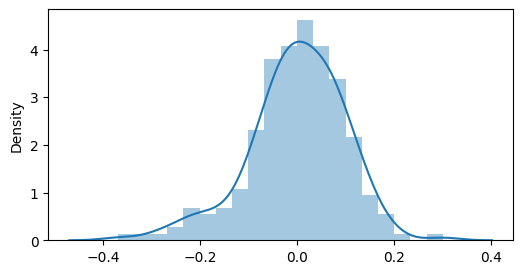

In [ ]:
plt.figure(figsize = ( 6,3))
res = y_test - y_test_pred

sns.distplot(res , bins = 20)


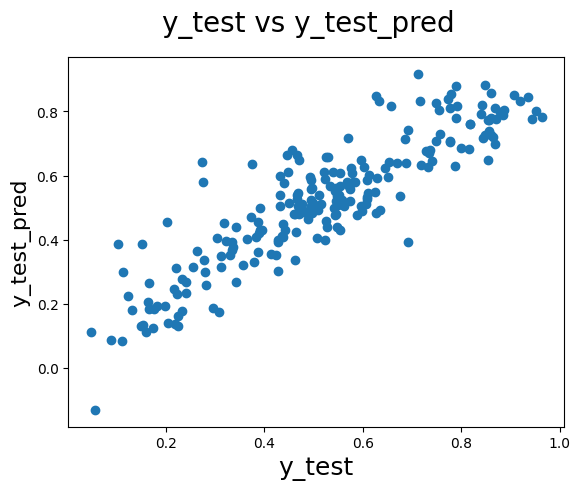

In [ ]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

#R^2 Value Test


In [ ]:
r2_score(y_test, y_test_pred)

0.7941977535477243

#Adjusted R^2 Value for TEST

In [ ]:
#R^2 score has find already
r2 = 0.7941977535477243

# n is number of rows in X

n = x_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = x_test.shape[1]

#  Adjusted R-squared using

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7853776572711981

# Comparing both test and Train models for final result

* Train R^2 : 0.830
* Train Adjusted R^2 : 0.827

* Test R^2 : 0.794
* Test Adjusted R^2 : 0.785

In [ ]:
r2_train = 0.830
r2_test = 0.794

In [ ]:
# Checking the difference between the test-train r2 score
print('Difference in r2 Score(%)',(r2_train - r2_test)*100)

Difference in r2 Score(%) 3.599999999999992


In [ ]:
Train_Adjusted_R2 = 0.827
Test_Adjusted_R2 = 0.785

In [ ]:
# Checking the difference between the test-train Adjusted_R2 score
print('Difference in Adjusted_R2 Score(%)',(Train_Adjusted_R2-Test_Adjusted_R2)*100)

Difference in Adjusted_R2 Score(%) 4.199999999999992


#FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.5480’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5480 units.

Weather Situation 3 (weathersit_3)(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered) - A coefficient value of ‘-0.2829’ indicated that, w.r.t Weathersit_3, a unit increase in Weathersit_3 variable decreases the bike hire numbers by -0.2829 units.

Year (yr) - A coefficient value of ‘0.2329’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2329 units.

So, it's suggested to consider these variables utmost importance while planning, to achieve maximum Booking